In [1]:
from autograph import autograph
import matplotlib.pyplot as plt

def draw_adjacency_matrix(
    graph: autograph.KnowledgeGraph,
    title: str
):
    matrix = graph.as_matrix()
    plt.imshow(matrix, cmap="Greys", interpolation="none")
    plt.title(title)
    plt.show()

Added scale free clusters
Added links


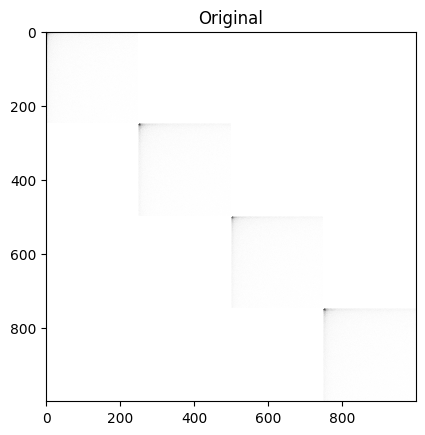

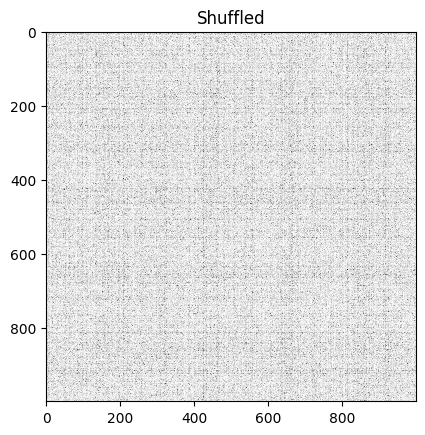

Clustering
> Running on 0..40000
	Cluster list: [Cluster { cluster_type: Strong, range: 0..9986 }, Cluster { cluster_type: Border, range: 9986..11848 }, Cluster { cluster_type: Strong, range: 11848..24493 }, Cluster { cluster_type: Border, range: 24493..24777 }, Cluster { cluster_type: Strong, range: 24777..25097 }, Cluster { cluster_type: Border, range: 25097..26912 }, Cluster { cluster_type: Strong, range: 26912..27277 }, Cluster { cluster_type: Border, range: 27277..28051 }, Cluster { cluster_type: Strong, range: 28051..39959 }, Cluster { cluster_type: Border, range: 39959..40000 }]
> Running on 0..9986
	Cluster list: [Cluster { cluster_type: Strong, range: 0..9986 }]
> Running on 9986..40000
	Cluster list: [Cluster { cluster_type: Strong, range: 9986..19979 }, Cluster { cluster_type: Border, range: 19979..20918 }, Cluster { cluster_type: Strong, range: 20918..39920 }, Cluster { cluster_type: Border, range: 39920..39988 }]
> Running on 9986..19979
	Cluster list: [Cluster { cluster_t

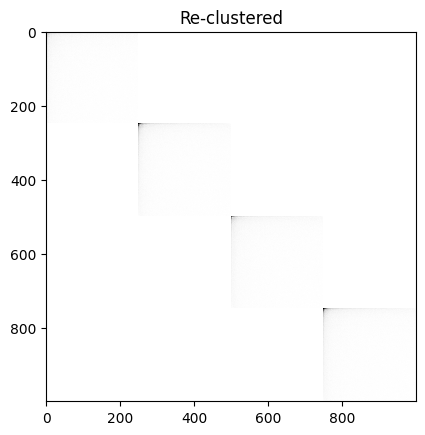

Cluster time: 4.017s
[(0, 10000), (10000, 20000), (20000, 30000), (30000, 40000)]


In [2]:
import time

cluster_size = 10_000
num_clusters = 4
pepper_amount = 1_000

builder = autograph.GraphBuilder(0)
for i in range(num_clusters):
    builder.add_scale_free_cluster(cluster_size, 100)

print("Added scale free clusters", flush=True)

for _ in range(pepper_amount):
    for i in range(num_clusters):
        builder.add_random_link(i, (i + 1) % num_clusters)

print("Added links", flush=True)

graph = builder.finalize_graph()
draw_adjacency_matrix(graph, "Original")

graph.shuffle_vertex_ids(0)
draw_adjacency_matrix(graph, "Shuffled")

print("Clustering", flush=True)
start_time = time.time()
graph.cluster(0.01, 5, 0.1, 250)
cluster_time = time.time() - start_time

draw_adjacency_matrix(graph, "Re-clustered")
print(f"Cluster time: {cluster_time:.3f}s", flush=True)
print(graph.get_clusters())